In [1]:
import pandas as pd
import numpy as np
np.random.seed(456)
import re
from tqdm import tqdm
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
train_data = pd.read_csv("train.csv").iloc[:, 1:].dropna(how = 'any')
train_data.index = range(len(train_data))
test_data = pd.read_csv("test.csv").iloc[:, 1:]
submission = pd.read_csv("sample_submission.csv")

In [3]:
train_data.shape, test_data.shape

((39992, 2), (5000, 1))

In [4]:
train_data.head()


,category,data
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [5]:
test_data.head()


,data
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 11년간 일하고 혈암과 백혈병 진단을 받은 ...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


<h2>Claensing Text</h2>

In [6]:
def clean_text(texts):
    corpus = []
    for i in range(0, len(texts)):
        review = re.sub(r'[@%\\*=()/~#&\+á?\xc3\xa1\-\|\.\:\;\!\-\,\_\~\$\'\"]', '',str(texts[i])) #remove punctuation
        review = re.sub(r'\d+','', str(texts[i]))# remove number
        review = review.lower() #lower case
        review = re.sub(r'\s+', ' ', review) #remove extra space
        review = re.sub(r'<[^>]+>','',review) #remove Html tags
        review = re.sub(r'\s+', ' ', review) #remove spaces
        review = re.sub(r"^\s+", '', review) #remove space from start
        review = re.sub(r'\s+$', '', review) #remove space from the end
        corpus.append(review)
    return corpus

In [7]:
train_data.data = clean_text(train_data.data)
test_data.data = clean_text(test_data.data)

cleansing string punctuation


In [8]:
train_data_text = list(train_data['data'])

train_clear_text = []

for i in tqdm(range(len(train_data_text))):
  train_clear_text.append(str(train_data_text[i]).replace('\\n', ''))
train_data['clear_text'] = train_clear_text
train_data.head()

100%|██████████| 39992/39992 [00:00<00:00, 349950.46it/s]


,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...","빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...","티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일..."
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [9]:
train_clear_text = list(train_data['clear_text'])

train_clear_text2 = []

for text in train_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  train_clear_text2.append(temp)
train_data['clear_text'] = train_clear_text2
train_data.head()

,category,data,clear_text
0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지...
1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...,학교이름에 남자 도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올...",빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올...
3,1,"티비 세,세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠시 딴일...",티비 세 세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴일...
4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타...


In [10]:
test_data_text = list(test_data['data'])

test_clear_text = []

for i in tqdm(range(len(test_data_text))):
  test_clear_text.append(test_data_text[i].replace('\\n', ' '))
test_data['clear_text'] = test_clear_text
test_data.head()

100%|██████████| 5000/5000 [00:00<00:00, 386336.79it/s]


,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에 *지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...","방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


In [11]:
test_clear_text = list(test_data['clear_text'])

test_clear_text2 = []

for text in test_clear_text:
  temp = re.sub('[-=+,#:;//●<>▲\?:^$.☆!★()Ⅰ@*\"※~>`\'…》]', ' ', text)
  test_clear_text2.append(temp)
test_data['clear_text'] = test_clear_text2
test_data.head()

,data,clear_text
0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못하...
1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에 지역 어린이...
2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요
3,국민위원에가 삼성편만들어요. 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사람이...
4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부...",방과후 유치원 어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부...


Using Mecab for toeknizing

In [12]:
from konlpy.tag import Mecab
mecab = Mecab(dicpath=r"C:\mecab\mecab-ko-dic")

In [13]:
stop_df = pd.read_csv('한국어불용어100.txt', sep = '\t', header = None, names = ['형태','품사','비율'])
stop_df.tail()

,형태,품사,비율
95,원,NNB,0.000492
96,잘,MAG,0.000491
97,통하,VV,0.000487
98,소리,NNG,0.000486
99,놓,VX,0.000483


In [14]:
stop_df.loc[100] = '가'
stop_df.loc[101] = '합니다'

In [15]:
stop_words = list(stop_df.형태)

아웃라이어를 제거합니다.

In [16]:
ind_list = [24885, 14916, 14605, 6641, 17406, 26957, 2175, 6885, 8947, 14966, 8198, 25955, 39167,21707, 12678,
           3023, 31971, 3730, 37153, 33481, 33369, 12927, 30773, 36431,12373,  37525,27530, 8958, 16884, 18072,
           4478, 7940, 16400, 16656]
train_data_sample = train_data.query('index in @ind_list')
print(train_data_sample)

       category                                               data  \
2175          0                                                  .   
3023          0  교복 자율화 실시해주셨으면 합니다... 교복은 현재 학생이 학교를 다닐때 꼭 입어야...   
3730          1  공정하지 못한 저널리즘j. 물론 조중동언론이 비판 받아야 하면 비판받아야 겠지만.....   
4478          1  유료수신하는 iptv 시청자들에게 강제로 부과하고있는 kbs tv수신료는 이중과세에...   
6641          2  서남대정상화를막는교육부. 사학법을바꾸기전에폐교는\n교육부와횡령이사장의음모론이다\n서...   
6885          2  정읍시 출산장려금 문제점. 광양시에서 현제 정읍시로 전입온지 년이 된 시민입니다 다...   
7940          0  제주도 난민에 대하여 반대합니다.. 안녕하십니까. 불철주야로 열심히 하시는 대통령님...   
8198          1  건전한 게임문화를 확립을 위하여 게임운영사의 게임내 게임 데이터판매응 처벌하여 주세...   
8947          1                나경원국회의원님 파면 반대합니다. 나경원국회의원님 파면반대합니다   
8958          1  축구협회간부교체및회장교체 ㆍ축구협회감사. 우리나라축구의시스템을 바꾸려면 전반적으로 ...   
12373         1  아시안게임 국가대표선발전 황당한 대진표. 월일 부산기장체육관에서 아시안게임 주짓수 ...   
12678         2  중계동 청소년 흡연이 심각합니다.. 노원구 중계동에 청소년 길거리 흡연이 심각합니다...   
12927         2  시험의 마킹단계에 대해서. 많은학생들이 마킹실수때문에 자신이 친 시험의 점수를 온전...   
14605         2  친자성

In [17]:
train_data = train_data.query('index not in @ind_list')
train_data.index = range(0, len(train_data))

Mecab으로 명사 추출

In [18]:
X_train = []

text = list(train_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_train.append(temp_X)

100%|██████████| 39958/39958 [00:44<00:00, 903.43it/s] 


In [19]:
X_test = []

text = list(test_data['clear_text'])

for i in tqdm(range(len(text))):
  temp_X = []
  temp_X = mecab.nouns(text[i]) # 토큰화
  temp_X = [word for word in temp_X if not word in stop_words] # 불용어 제거
  temp_X = [word for word in temp_X if len(word) > 1]
  X_test.append(temp_X)

100%|██████████| 5000/5000 [00:05<00:00, 856.50it/s] 


3. 모델링

In [20]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,  ReduceLROnPlateau
from tensorflow.keras.regularizers import *
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam, RMSprop
import tensorflow as tf
tf.random.set_seed(777)

In [21]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [22]:
threshold = 11
total_cnt = len(tokenizer.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 45144
등장 빈도가 10번 이하인 희귀 단어의 수: 32528
단어 집합에서 희귀 단어의 비율: 72.05387205387206
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 3.2528401808086937


In [23]:
vocab_size = total_cnt - rare_cnt + 1 # 전체 단어 개수 중 빈도수 2이하인 단어 개수는 제거. 0번 패딩 토큰을 고려하여 +1
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 12617


In [24]:
tokenizer = Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(X_train)
token_X_train = tokenizer.texts_to_sequences(X_train)
token_X_test = tokenizer.texts_to_sequences(X_test)

In [25]:
y_train = to_categorical(np.array(train_data['category']))

In [26]:
drop_train = [index for index, sentence in enumerate(token_X_train) if len(sentence) < 1]


In [27]:
# 빈 샘플들을 제거
del_X_train = np.delete(token_X_train, drop_train, axis=0)
del_y_train = np.delete(y_train, drop_train, axis=0)
print(len(del_X_train))
print(len(del_y_train))

39933
39933


c:\Users\AILab\anaconda3\envs\nlp\lib\site-packages\numpy\lib\function_base.py:5071: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  arr = asarray(arr)


train data의 최대 길이 : 5661
train data의 평균 길이 : 66.6274259384469


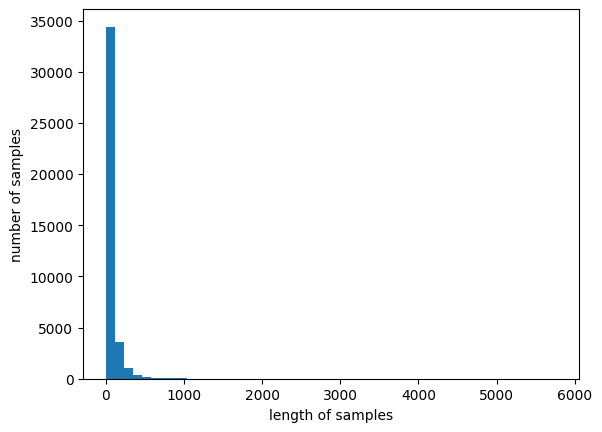

In [28]:
print('train data의 최대 길이 :',max(len(l) for l in del_X_train))
print('train data의 평균 길이 :',sum(map(len, del_X_train))/len(del_X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

test data의 최대 길이 :  3806
test data의 평균 길이 :  66.188


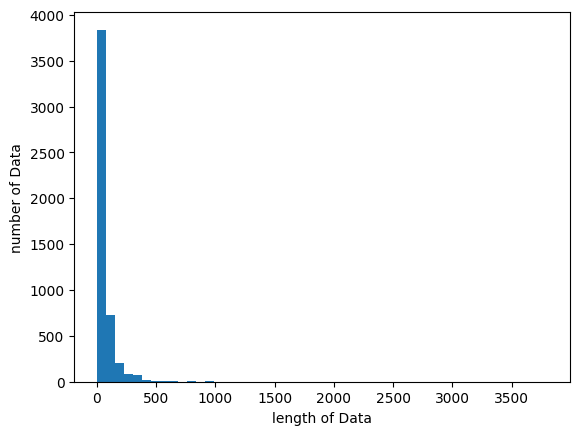

In [29]:
print("test data의 최대 길이 : ", max(len(l) for l in token_X_test))
print("test data의 평균 길이 : ", sum(map(len, token_X_test))/ len(token_X_test))
plt.hist([len(s) for s in token_X_test], bins=50)
plt.xlabel('length of Data')
plt.ylabel('number of Data')
plt.show()

In [30]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt = cnt + 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [31]:
max_len = 300
below_threshold_len(max_len, del_X_train)

전체 샘플 중 길이가 300 이하인 샘플의 비율: 97.22284827085367


In [32]:
pad_X_train = pad_sequences(del_X_train, maxlen = max_len)
pad_X_test = pad_sequences(token_X_test, maxlen = max_len)

<h2>모델 1</h2>

In [33]:
model1 = Sequential()
model1.add(Embedding(vocab_size,64, input_length=max_len))
model1.add(Conv1D(64, 5, activation = 'relu', padding = 'same', kernel_regularizer=l2(0.01), kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02)))
model1.add(GlobalMaxPooling1D())
model1.add(Dense(3, activation = 'softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02)))
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 64)           807488    
                                                                 
 conv1d (Conv1D)             (None, 300, 64)           20544     
                                                                 
 global_max_pooling1d (Globa  (None, 64)               0         
 lMaxPooling1D)                                                  
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 828,227
Trainable params: 828,227
Non-trainable params: 0
_________________________________________________________________


In [34]:
model1.compile(optimizer=RMSprop(lr = .0005), loss='categorical_crossentropy', metrics=['acc'])
reLR = ReduceLROnPlateau(patience = 5, verbose=1, factor = .2)
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience = 2)
mc = ModelCheckpoint(filepath = '1028_1.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True, restore_best_weights = True)

c:\Users\AILab\anaconda3\envs\nlp\lib\site-packages\keras\optimizers\optimizer_v2\rmsprop.py:140: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [35]:
val_rate = 0.2

In [36]:
history1 = model1.fit(pad_X_train, del_y_train, epochs=30, batch_size= 64, shuffle = True, validation_split=val_rate, verbose = 1, callbacks=[es, mc, reLR])

Epoch 1/30
500/500 [==============================] - ETA: 0s - loss: 0.8674 - acc: 0.7231
Epoch 1: val_acc improved from -inf to 0.84775, saving model to 1028_1.h5
500/500 [==============================] - 8s 10ms/step - loss: 0.8674 - acc: 0.7231 - val_loss: 0.5358 - val_acc: 0.8478 - lr: 5.0000e-04
Epoch 2/30
500/500 [==============================] - ETA: 0s - loss: 0.4713 - acc: 0.8528
Epoch 2: val_acc improved from 0.84775 to 0.86102, saving model to 1028_1.h5
500/500 [==============================] - 5s 10ms/step - loss: 0.4713 - acc: 0.8528 - val_loss: 0.4277 - val_acc: 0.8610 - lr: 5.0000e-04
Epoch 3/30
497/500 [============================>.] - ETA: 0s - loss: 0.4002 - acc: 0.8648
Epoch 3: val_acc improved from 0.86102 to 0.86691, saving model to 1028_1.h5
500/500 [==============================] - 5s 10ms/step - loss: 0.4001 - acc: 0.8649 - val_loss: 0.3886 - val_acc: 0.8669 - lr: 5.0000e-04
Epoch 4/30
499/500 [============================>.] - ETA: 0s - loss: 0.3672 - acc

In [37]:
model1 = load_model('1028_1.h5') # val_acc = 0.8692

In [38]:
pred1 = model1.predict(pad_X_test)


157/157 [==============================] - 1s 3ms/step


<h2>Model 2</h2>

In [39]:
model2 = Sequential()
model2.add(Embedding(vocab_size, 64, input_length = max_len))
model2.add(Conv1D(64, 5, activation = 'relu',kernel_regularizer= l2(0.001)))
model2.add(MaxPooling1D(5))
model2.add(Dropout(.5))
model2.add(Conv1D(64, 5 ,activation = 'relu', kernel_regularizer=  l2(.001)))
model2.add(GlobalMaxPooling1D())
model2.add(BatchNormalization())
model2.add(Dense(3, activation = 'softmax', kernel_regularizer = l2(0.001)))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 300, 64)           807488    
                                                                 
 conv1d_1 (Conv1D)           (None, 296, 64)           20544     
                                                                 
 max_pooling1d (MaxPooling1D  (None, 59, 64)           0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 59, 64)            0         
                                                                 
 conv1d_2 (Conv1D)           (None, 55, 64)            20544     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                     

In [40]:
model2.compile(optimizer = RMSprop(lr = .0005), loss = 'categorical_crossentropy', metrics = ['acc'])

callback_ear = [EarlyStopping(monitor = 'val_loss', patience = 2, mode = 'min', verbose = 1), ModelCheckpoint(filepath =  '1028_2.h5', monitor = 'val_acc', save_best_only = True, mode = 'max',verbose = 1)]
history2 = model2.fit(pad_X_train, del_y_train, epochs = 15, batch_size = 64, verbose = 1, validation_split = val_rate, callbacks=callback_ear)

Epoch 1/15
500/500 [==============================] - ETA: 0s - loss: 0.6910 - acc: 0.7578
Epoch 1: val_acc improved from -inf to 0.86741, saving model to 1028_2.h5
500/500 [==============================] - 104s 190ms/step - loss: 0.6910 - acc: 0.7578 - val_loss: 0.5301 - val_acc: 0.8674
Epoch 2/15
498/500 [============================>.] - ETA: 0s - loss: 0.4337 - acc: 0.8754
Epoch 2: val_acc improved from 0.86741 to 0.87830, saving model to 1028_2.h5
500/500 [==============================] - 84s 169ms/step - loss: 0.4337 - acc: 0.8754 - val_loss: 0.4150 - val_acc: 0.8783
Epoch 3/15
499/500 [============================>.] - ETA: 0s - loss: 0.3767 - acc: 0.8880
Epoch 3: val_acc improved from 0.87830 to 0.88106, saving model to 1028_2.h5
500/500 [==============================] - 93s 186ms/step - loss: 0.3767 - acc: 0.8879 - val_loss: 0.3891 - val_acc: 0.8811
Epoch 4/15
498/500 [============================>.] - ETA: 0s - loss: 0.3325 - acc: 0.9009
Epoch 4: val_acc did not improve fr

In [41]:
model2 = load_model('1028_2.h5') # val_acc = 0.8786

In [42]:
pred2 = model2.predict(pad_X_test)

157/157 [==============================] - 14s 91ms/step


<h2>Model 3</h2>

In [43]:
model3 = Sequential()
model3.add(Embedding(vocab_size, 64, input_length = max_len))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(Conv1D(32, 5, activation='relu'))
model3.add(MaxPooling1D(pool_size=4))
model3.add(LSTM(16))
model3.add(Dropout(0.4))
model3.add(Dense(3, activation='softmax'))
model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 300, 64)           807488    
                                                                 
 conv1d_3 (Conv1D)           (None, 296, 32)           10272     
                                                                 
 conv1d_4 (Conv1D)           (None, 292, 32)           5152      
                                                                 
 conv1d_5 (Conv1D)           (None, 288, 32)           5152      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 72, 32)           0         
 1D)                                                             
                                                                 
 lstm (LSTM)                 (None, 16)                3136      
                                                      

In [44]:
model3.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])


In [45]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath =  '1028_3.h5', monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history3 = model3.fit(pad_X_train, del_y_train, epochs=30, batch_size=32, validation_split=val_rate, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
999/999 [==============================] - ETA: 0s - loss: 0.5308 - acc: 0.7869
Epoch 1: val_acc improved from -inf to 0.86228, saving model to 1028_3.h5
999/999 [==============================] - 307s 294ms/step - loss: 0.5308 - acc: 0.7869 - val_loss: 0.3711 - val_acc: 0.8623
Epoch 2/30
998/999 [============================>.] - ETA: 0s - loss: 0.3538 - acc: 0.8766
Epoch 2: val_acc improved from 0.86228 to 0.87455, saving model to 1028_3.h5
999/999 [==============================] - 215s 215ms/step - loss: 0.3538 - acc: 0.8766 - val_loss: 0.3341 - val_acc: 0.8745
Epoch 3/30
998/999 [============================>.] - ETA: 0s - loss: 0.3229 - acc: 0.8846
Epoch 3: val_acc improved from 0.87455 to 0.87667, saving model to 1028_3.h5
999/999 [==============================] - 153s 153ms/step - loss: 0.3229 - acc: 0.8846 - val_loss: 0.3365 - val_acc: 0.8767
Epoch 4/30
999/999 [==============================] - ETA: 0s - loss: 0.3048 - acc: 0.8925
Epoch 4: val_acc improved from 0.

In [46]:
model3 = load_model('1028_3.h5') # 0.8811

In [47]:
pred3 = model3.predict(pad_X_test)


157/157 [==============================] - 7s 43ms/step


<h2>Model 4</h2>

In [48]:
model4 = Sequential()
model4.add(Embedding(vocab_size, 32, input_length=max_len))
model4.add(Dropout(0.3))
model4.add(Conv1D(32, 5, activation='relu'))
model4.add(MaxPooling1D(pool_size=4))
model4.add(LSTM(32))
model4.add(Dense(3, activation='softmax'))
model4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 300, 32)           403744    
                                                                 
 dropout_2 (Dropout)         (None, 300, 32)           0         
                                                                 
 conv1d_6 (Conv1D)           (None, 296, 32)           5152      
                                                                 
 max_pooling1d_2 (MaxPooling  (None, 74, 32)           0         
 1D)                                                             
                                                                 
 lstm_1 (LSTM)               (None, 32)                8320      
                                                                 
 dense_3 (Dense)             (None, 3)                 99        
                                                      

In [49]:
model4.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr = .0005), metrics=['acc'])

In [50]:
callback_ear = [EarlyStopping(monitor = 'val_acc', mode = 'max', patience = 2, verbose = 1), ModelCheckpoint(filepath = '1028_4.h5', monitor = 'val_acc', save_best_only = True, mode = 'max', verbose = 1)]

history4 = model4.fit(pad_X_train, del_y_train, epochs=30, batch_size=64, validation_split=val_rate, verbose = 1,shuffle = True, callbacks= callback_ear)

Epoch 1/30
500/500 [==============================] - ETA: 0s - loss: 0.5724 - acc: 0.7692
Epoch 1: val_acc improved from -inf to 0.87129, saving model to 1028_4.h5
500/500 [==============================] - 76s 139ms/step - loss: 0.5724 - acc: 0.7692 - val_loss: 0.3598 - val_acc: 0.8713
Epoch 2/30
499/500 [============================>.] - ETA: 0s - loss: 0.3316 - acc: 0.8763
Epoch 2: val_acc improved from 0.87129 to 0.87818, saving model to 1028_4.h5
500/500 [==============================] - 70s 140ms/step - loss: 0.3315 - acc: 0.8763 - val_loss: 0.3279 - val_acc: 0.8782
Epoch 3/30
498/500 [============================>.] - ETA: 0s - loss: 0.2949 - acc: 0.8887
Epoch 3: val_acc improved from 0.87818 to 0.88143, saving model to 1028_4.h5
500/500 [==============================] - 62s 124ms/step - loss: 0.2949 - acc: 0.8886 - val_loss: 0.3170 - val_acc: 0.8814
Epoch 4/30
500/500 [==============================] - ETA: 0s - loss: 0.2767 - acc: 0.8940
Epoch 4: val_acc improved from 0.881

In [51]:
model4 = load_model('1028_4.h5') # 0.8830

In [52]:
pred4 = model4.predict(pad_X_test)

157/157 [==============================] - 7s 44ms/step


<h2>Model 5 - Bert</h2>

In [53]:
import tensorflow as tf
import numpy as np
import pandas as pd
from transformers import *
import json
import numpy as np
import pandas as pd
from tqdm import tqdm
import os
import re

c:\Users\AILab\anaconda3\envs\nlp\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


Moving 10 files to the new cache system


100%|██████████| 10/10 [00:08<00:00,  1.18it/s]


In [54]:
import logging
import os
import unicodedata
from shutil import copyfile

from transformers import PreTrainedTokenizer


logger = logging.getLogger(__name__)

VOCAB_FILES_NAMES = {"vocab_file": "tokenizer_78b3253a26.model",
                     "vocab_txt": "vocab.txt"}

PRETRAINED_VOCAB_FILES_MAP = {
    "vocab_file": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/tokenizer_78b3253a26.model",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/tokenizer_78b3253a26.model",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/tokenizer_78b3253a26.model"
    },
    "vocab_txt": {
        "monologg/kobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert/vocab.txt",
        "monologg/kobert-lm": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/kobert-lm/vocab.txt",
        "monologg/distilkobert": "https://s3.amazonaws.com/models.huggingface.co/bert/monologg/distilkobert/vocab.txt"
    }
}

PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES = {
    "monologg/kobert": 512,
    "monologg/kobert-lm": 512,
    "monologg/distilkobert": 512
}

PRETRAINED_INIT_CONFIGURATION = {
    "monologg/kobert": {"do_lower_case": False},
    "monologg/kobert-lm": {"do_lower_case": False},
    "monologg/distilkobert": {"do_lower_case": False}
}

SPIECE_UNDERLINE = u'▁'


class KoBertTokenizer(PreTrainedTokenizer):
    """
        SentencePiece based tokenizer. Peculiarities:
            - requires `SentencePiece <https://github.com/google/sentencepiece>`_
    """
    vocab_files_names = VOCAB_FILES_NAMES
    pretrained_vocab_files_map = PRETRAINED_VOCAB_FILES_MAP
    pretrained_init_configuration = PRETRAINED_INIT_CONFIGURATION
    max_model_input_sizes = PRETRAINED_POSITIONAL_EMBEDDINGS_SIZES

    def __init__(
            self,
            vocab_file,
            vocab_txt,
            do_lower_case=False,
            remove_space=True,
            keep_accents=False,
            unk_token="[UNK]",
            sep_token="[SEP]",
            pad_token="[PAD]",
            cls_token="[CLS]",
            mask_token="[MASK]",
            **kwargs):
        super().__init__(
            unk_token=unk_token,
            sep_token=sep_token,
            pad_token=pad_token,
            cls_token=cls_token,
            mask_token=mask_token,
            **kwargs
        )

        # Build vocab
        self.token2idx = dict()
        self.idx2token = []
        with open(vocab_txt, 'r', encoding='utf-8') as f:
            for idx, token in enumerate(f):
                token = token.strip()
                self.token2idx[token] = idx
                self.idx2token.append(token)

        self.max_len_single_sentence = self.model_max_length - 2  # take into account special tokens
        self.max_len_sentences_pair = self.model_max_length - 3  # take into account special tokens

        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")

        self.do_lower_case = do_lower_case
        self.remove_space = remove_space
        self.keep_accents = keep_accents
        self.vocab_file = vocab_file
        self.vocab_txt = vocab_txt

        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(vocab_file)

    @property
    def vocab_size(self):
        return len(self.idx2token)

    def __getstate__(self):
        state = self.__dict__.copy()
        state["sp_model"] = None
        return state

    def __setstate__(self, d):
        self.__dict__ = d
        try:
            import sentencepiece as spm
        except ImportError:
            logger.warning("You need to install SentencePiece to use KoBertTokenizer: https://github.com/google/sentencepiece"
                           "pip install sentencepiece")
        self.sp_model = spm.SentencePieceProcessor()
        self.sp_model.Load(self.vocab_file)

    def preprocess_text(self, inputs):
        if self.remove_space:
            outputs = " ".join(inputs.strip().split())
        else:
            outputs = inputs
        outputs = outputs.replace("``", '"').replace("''", '"')

        if not self.keep_accents:
            outputs = unicodedata.normalize('NFKD', outputs)
            outputs = "".join([c for c in outputs if not unicodedata.combining(c)])
        if self.do_lower_case:
            outputs = outputs.lower()

        return outputs

    def _tokenize(self, text, return_unicode=True, sample=False):
        """ Tokenize a string. """
        text = self.preprocess_text(text)

        if not sample:
            pieces = self.sp_model.EncodeAsPieces(text)
        else:
            pieces = self.sp_model.SampleEncodeAsPieces(text, 64, 0.1)
        new_pieces = []
        for piece in pieces:
            if len(piece) > 1 and piece[-1] == str(",") and piece[-2].isdigit():
                cur_pieces = self.sp_model.EncodeAsPieces(piece[:-1].replace(SPIECE_UNDERLINE, ""))
                if piece[0] != SPIECE_UNDERLINE and cur_pieces[0][0] == SPIECE_UNDERLINE:
                    if len(cur_pieces[0]) == 1:
                        cur_pieces = cur_pieces[1:]
                    else:
                        cur_pieces[0] = cur_pieces[0][1:]
                cur_pieces.append(piece[-1])
                new_pieces.extend(cur_pieces)
            else:
                new_pieces.append(piece)

        return new_pieces

    def _convert_token_to_id(self, token):
        """ Converts a token (str/unicode) in an id using the vocab. """
        return self.token2idx.get(token, self.token2idx[self.unk_token])

    def _convert_id_to_token(self, index, return_unicode=True):
        """Converts an index (integer) in a token (string/unicode) using the vocab."""
        return self.idx2token[index]

    def convert_tokens_to_string(self, tokens):
        """Converts a sequence of tokens (strings for sub-words) in a single string."""
        out_string = "".join(tokens).replace(SPIECE_UNDERLINE, " ").strip()
        return out_string

    def build_inputs_with_special_tokens(self, token_ids_0, token_ids_1=None):
        """
        Build model inputs from a sequence or a pair of sequence for sequence classification tasks
        by concatenating and adding special tokens.
        A RoBERTa sequence has the following format:
            single sequence: [CLS] X [SEP]
            pair of sequences: [CLS] A [SEP] B [SEP]
        """
        if token_ids_1 is None:
            return [self.cls_token_id] + token_ids_0 + [self.sep_token_id]
        cls = [self.cls_token_id]
        sep = [self.sep_token_id]
        return cls + token_ids_0 + sep + token_ids_1 + sep

    def get_special_tokens_mask(self, token_ids_0, token_ids_1=None, already_has_special_tokens=False):
        """
        Retrieves sequence ids from a token list that has no special tokens added. This method is called when adding
        special tokens using the tokenizer ``prepare_for_model`` or ``encode_plus`` methods.
        Args:
            token_ids_0: list of ids (must not contain special tokens)
            token_ids_1: Optional list of ids (must not contain special tokens), necessary when fetching sequence ids
                for sequence pairs
            already_has_special_tokens: (default False) Set to True if the token list is already formated with
                special tokens for the model
        Returns:
            A list of integers in the range [0, 1]: 0 for a special token, 1 for a sequence token.
        """

        if already_has_special_tokens:
            if token_ids_1 is not None:
                raise ValueError(
                    "You should not supply a second sequence if the provided sequence of "
                    "ids is already formated with special tokens for the model."
                )
            return list(map(lambda x: 1 if x in [self.sep_token_id, self.cls_token_id] else 0, token_ids_0))

        if token_ids_1 is not None:
            return [1] + ([0] * len(token_ids_0)) + [1] + ([0] * len(token_ids_1)) + [1]
        return [1] + ([0] * len(token_ids_0)) + [1]

    def create_token_type_ids_from_sequences(self, token_ids_0, token_ids_1=None):
        """
        Creates a mask from the two sequences passed to be used in a sequence-pair classification task.
        A BERT sequence pair mask has the following format:
        0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1
        | first sequence    | second sequence
        if token_ids_1 is None, only returns the first portion of the mask (0's).
        """
        sep = [self.sep_token_id]
        cls = [self.cls_token_id]
        if token_ids_1 is None:
            return len(cls + token_ids_0 + sep) * [0]
        return len(cls + token_ids_0 + sep) * [0] + len(token_ids_1 + sep) * [1]

    def save_vocabulary(self, save_directory):
        """ Save the sentencepiece vocabulary (copy original file) and special tokens file
            to a directory.
        """
        if not os.path.isdir(save_directory):
            logger.error("Vocabulary path ({}) should be a directory".format(save_directory))
            return

        # 1. Save sentencepiece model
        out_vocab_model = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_file"])

        if os.path.abspath(self.vocab_file) != os.path.abspath(out_vocab_model):
            copyfile(self.vocab_file, out_vocab_model)

        # 2. Save vocab.txt
        index = 0
        out_vocab_txt = os.path.join(save_directory, VOCAB_FILES_NAMES["vocab_txt"])
        with open(out_vocab_txt, "w", encoding="utf-8") as writer:
            for token, token_index in sorted(self.token2idx.items(), key=lambda kv: kv[1]):
                if index != token_index:
                    logger.warning(
                        "Saving vocabulary to {}: vocabulary indices are not consecutive."
                        " Please check that the vocabulary is not corrupted!".format(out_vocab_txt)
                    )
                    index = token_index
                writer.write(token + "\n")
                index += 1

        return out_vocab_model, out_vocab_txt

In [55]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [56]:
train = train.query('index not in @ind_list')
train.index = range(0, len(train))

In [57]:
train.head(5)

,index,category,data
0,0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요.. 국민세금으로 일부를 위한 정책펴지...
1,1,0,학교이름에 '남자'도 붙여주세요. 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,2,1,"빙상연맹, 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요.. 최근 동계올..."
3,3,1,"티비 12세,15세 관람가도 연령확인 의무화 하자.. 제기 에전에 티비를 보다가 잠..."
4,4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야. 무더운 여름철에는 남성들도 노넥타...


In [58]:
test.head(5)

,index,data
0,0,소년법 폐지해주세요. 법 아래에서 보호받아야 할 아이들이\n법으로 인해 보호받지 못...
1,1,국공립 유치원 증설에 관하여. 국공립 유치원 부지 학보와건립및 증설에\n*지역 어린...
2,2,나경원파면. 나경원의원의 동계올림픽 위원을 파면해 주세요
3,3,국민위원에가 삼성편만들어요. 삼성에서 11년간 일하고 혈암과 백혈병 진단을 받은 ...
4,4,"방과후,유치원,어린이집 영어교육을 유지시켜주세요. 저는 아이 셋 키우는 평범한 주부..."


train 데이터와 test 데이터를 전처리하도록 하겠습니다.<br>
특수 문자들을 제거하고, 띄어쓰기가 많은 부분만 간단히 전처리 해주도록 하겠습니다.<br>
숫자 제거

In [59]:
train['data'] = train['data'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》\\n\t]+', " ", regex=True)
test['data'] = test['data'].str.replace(r'[-=+,#/\?:^$.@*\"※~&%ㆍ!』\\‘|\(\)\[\]\<\>`\'…》]', " ", regex=True)

train['data'] = train['data'].str.replace(r'\t+', " ", regex=True)
test['data'] = test['data'].str.replace(r'\t+', " ", regex=True)

train['data'] = train['data'].str.replace(r'[\\n]+'," ", regex=True)
test['data'] = test['data'].str.replace(r'[\\n]+'," ", regex=True)


In [ ]:
train['data'] = train['data'].str.replace(r'[-+]?\d+'," ", regex=True)
test['data'] = test['data'].str.replace(r'[-+]?\d+'," ", regex=True)

In [ ]:
train.head(5)

,index,category,data
0,0,2,신혼부부위한 주택정책 보다 보육시설 늘려주세요 국민세금으로 일부를 위한 정책펴지 ...
1,1,0,학교이름에 남자 도 붙여주세요 울산여자중학교에 재학중인 학생입니다 최근 양성평등...
2,2,1,빙상연맹 대한축구협회등 각종 체육협회의 비리를 철저하게 밝혀주세요 최근 동계올림...
3,3,1,티비 세 세 관람가도 연령확인 의무화 하자 제기 에전에 티비를 보다가 잠시 딴...
4,4,1,무더운 여름철엔 남성들도 시원한 자율복장을 해야 무더운 여름철에는 남성들도 노넥타...


In [ ]:
test.head(5)

,index,data
0,0,소년법 폐지해주세요 법 아래에서 보호받아야 할 아이들이 법으로 인해 보호받지 못...
1,1,국공립 유치원 증설에 관하여 국공립 유치원 부지 학보와건립및 증설에 지역 어린...
2,2,나경원파면 나경원의원의 동계올림픽 위원을 파면해 주세요
3,3,국민위원에가 삼성편만들어요 삼성에서 년간 일하고 혈암과 백혈병 진단을 받은 사...
4,4,방과후 유치원 어린이집 영어교육을 유지시켜주세요 저는 아이 셋 키우는 평범한 주부...


In [ ]:
tokenizer = KoBertTokenizer.from_pretrained('monologg/kobert')

loading file tokenizer_78b3253a26.model from cache at C:\Users\AILab/.cache\huggingface\hub\models--monologg--kobert\snapshots\8ebf2818cfd85570737d31ed8cd7aaa000e7056c\tokenizer_78b3253a26.model
loading file vocab.txt from cache at C:\Users\AILab/.cache\huggingface\hub\models--monologg--kobert\snapshots\8ebf2818cfd85570737d31ed8cd7aaa000e7056c\vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\AILab/.cache\huggingface\hub\models--monologg--kobert\snapshots\8ebf2818cfd85570737d31ed8cd7aaa000e7056c\tokenizer_config.json
loading configuration file config.json from cache at C:\Users\AILab/.cache\huggingface\hub\models--monologg--kobert\snapshots\8ebf2818cfd85570737d31ed8cd7aaa000e7056c\config.json
Model config BertConfig {
  "_name_or_path": "monologg/kobert",
  "architectures": [
    "BertModel"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,

In [ ]:
#KoElectra
from transformers import ElectraTokenizer


In [ ]:
tokenizer = ElectraTokenizer.from_pretrained("monologg/koelectra-base-v3-discriminator")

Downloading: 100%|██████████| 263k/263k [00:00<00:00, 343kB/s]  
Downloading: 100%|██████████| 61.0/61.0 [00:00<00:00, 15.1kB/s]
loading file vocab.txt from cache at C:\Users\AILab/.cache\huggingface\hub\models--monologg--koelectra-base-v3-discriminator\snapshots\68b30cd259f34a4b5aa8786392612ba2a2617fcc\vocab.txt
loading file added_tokens.json from cache at None
loading file special_tokens_map.json from cache at None
loading file tokenizer_config.json from cache at C:\Users\AILab/.cache\huggingface\hub\models--monologg--koelectra-base-v3-discriminator\snapshots\68b30cd259f34a4b5aa8786392612ba2a2617fcc\tokenizer_config.json
Downloading: 100%|██████████| 467/467 [00:00<00:00, 117kB/s]
loading configuration file config.json from cache at C:\Users\AILab/.cache\huggingface\hub\models--monologg--koelectra-base-v3-discriminator\snapshots\68b30cd259f34a4b5aa8786392612ba2a2617fcc\config.json
Model config ElectraConfig {
  "_name_or_path": "monologg/koelectra-base-v3-discriminator",
  "architect

In [ ]:
import collections
def convert_data(data_df):
    global tokenizer
    
    SEQ_LEN = 512 #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
    tokens, masks, segments, targets = [], [], [], []
    
    for i in tqdm(range(len(data_df))):
        # token : 문장을 토큰화함
        # token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, pad_to_max_length=True)
        token = tokenizer.tokenize(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, pad_to_max_length=True)
        token = tokenizer.convert_tokens_to_ids(token)
       
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(data_df[LABEL_COLUMN][i])

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

def convert_data2(data_x, data_y):
    global tokenizer
    global max_len
    
    SEQ_LEN = max_len #SEQ_LEN : 버트에 들어갈 인풋의 길이
    
    tokens, masks, segments, targets = [], [], [], []
    
    for i in tqdm(range(len(data_x))):
        # token : 문장을 토큰화함
        # token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, pad_to_max_length=True)
        token = data_x[i]
       
        # 마스크는 토큰화한 문장에서 패딩이 아닌 부분은 1, 패딩인 부분은 0으로 통일
        
        num_zeros = (token == 0).sum() #token.count(0)
        # print(num_zeros, token)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        
        # 문장의 전후관계를 구분해주는 세그먼트는 문장이 1개밖에 없으므로 모두 0
        segment = [0]*SEQ_LEN

        # 버트 인풋으로 들어가는 token, mask, segment를 tokens, segments에 각각 저장
        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        
        # 정답(긍정 : 1 부정 0)을 targets 변수에 저장해 줌
        targets.append(np.argmax(data_y[i]))

    # tokens, masks, segments, 정답 변수 targets를 numpy array로 지정    
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_df[LABEL_COLUMN] = data_df[LABEL_COLUMN].astype(int)
    data_x, data_y = convert_data(data_df)
    return data_x, data_y

  # 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def load_data2(data_x, data_y):
    data_x, data_y = convert_data2(data_x, data_y)
    return data_x, data_y

# SEQ_LEN = max_len #512
SEQ_LEN = 512
BATCH_SIZE = 20
# 긍부정 문장을 포함하고 있는 칼럼
DATA_COLUMN = "data"
# 긍정인지 부정인지를 (1=긍정,0=부정) 포함하고 있는 칼럼
LABEL_COLUMN = "category"

# train 데이터를 버트 인풋에 맞게 변환
train_x, train_y = load_data(train)
# train_x, train_y = load_data2(pad_X_train, del_y_train)
# train_x, train_y = pad_X_train, del_y_train

Streaming output truncated to the last 5000 lines.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
 87%|████████▋ | 34969/39966 [03:58<00:34, 143.09it/s]Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyword arguments {'max_length': 512, 'pad_to_max_length': True} not recognized.
Keyw

In [ ]:
arr = np.array([0.0, 1.0, 0.0])
print(np.argmax(arr))

arr = np.array([1.0, 0.0, 0.0])
print(np.argmax(arr))

arr = np.array([0.0, 0.0, 1.0])
print(np.argmax(arr))

1
0
2


In [ ]:
# TPU 객체 만들기
resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
tf.config.experimental_connect_to_cluster(resolver)
tf.tpu.experimental.initialize_tpu_system(resolver)

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Initializing the TPU system: grpc://10.7.51.90:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.7.51.90:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


In [ ]:

def create_sentiment_bert():
  # 버트 pretrained 모델 로드
  model = TFBertModel.from_pretrained("monologg/kobert", from_pt=True)
  # 토큰 인풋, 마스크 인풋, 세그먼트 인풋 정의
  token_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_word_ids')
  mask_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_masks')
  segment_inputs = tf.keras.layers.Input((SEQ_LEN,), dtype=tf.int32, name='input_segment')
  # 인풋이 [토큰, 마스크, 세그먼트]인 모델 정의
  bert_outputs = model([token_inputs, mask_inputs, segment_inputs])
  dnn_units = 256 #256
  DROPOUT_RATE = 0.2

  bert_outputs = bert_outputs[1]
  # sentiment_first = tf.keras.layers.Dense(3, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02))(bert_outputs)
  mid_layer = tf.keras.layers.Dense(dnn_units, activation='relu', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02))(bert_outputs)
  mid_layer2 = tf.keras.layers.Dropout(rate=DROPOUT_RATE)(mid_layer)
  sentiment_first = tf.keras.layers.Dense(3, activation='softmax', kernel_initializer=tf.keras.initializers.TruncatedNormal(0.02))(mid_layer2)

  sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_first)
  # 옵티마이저는 간단하게 Adam 옵티마이저 활용
  sentiment_model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.00001), loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
      metrics=['sparse_categorical_accuracy'])
  return sentiment_model

In [ ]:
print(train_x)
print(train_y)

[array([[   2, 3010, 7931, ...,    1,    1,    1],
       [   2, 4949, 7096, ...,    1,    1,    1],
       [   2, 2551, 6527, ...,    1,    1,    1],
       ...,
       [   2, 2095, 6553, ...,    1,    1,    1],
       [   2, 1103, 6379, ...,    1,    1,    1],
       [   2, 4991, 6573, ...,    1,    1,    1]]), array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]]), array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])]
[2 0 1 ... 2 2 0]


In [ ]:
num_epochs = 3
batch_size = 20
strategy = tf.distribute.experimental.TPUStrategy(resolver)
# TPU를 활용하기 위해 context로 묶어주기
with strategy.scope():
  sentiment_model = create_sentiment_bert()
  sentiment_model.fit(train_x, train_y, epochs=num_epochs, shuffle=False, batch_size=batch_size)
  sentiment_model.save_weights(os.path.join(path,"sentiment_model.h5"))

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


Epoch 1/3
   2/1999 [..............................] - ETA: 12:54:02 - loss: 1.0926 - sparse_categorical_accuracy: 0.2750WARNING:tensorflow:Callbacks method `on_train_batch_end` is slow compared to the batch time (batch time: 0.0108s vs `on_train_batch_end` time: 0.1421s). Check your callbacks.


1999/1999 [==============================] - 388s 194ms/step - loss: 0.4959 - sparse_categorical_accuracy: 0.7842
Epoch 2/3
1999/1999 [==============================] - 304s 152ms/step - loss: 0.2928 - sparse_categorical_accuracy: 0.8856
Epoch 3/3
1999/1999 [==============================] - 310s 155ms/step - loss: 0.2490 - sparse_categorical_accuracy: 0.9023


In [ ]:
def predict_convert_data(data_df):
    global tokenizer
    tokens, masks, segments = [], [], []
    
    for i in tqdm(range(len(data_df))):

        token = tokenizer.encode(data_df[DATA_COLUMN][i], max_length=SEQ_LEN, pad_to_max_length=True)
        num_zeros = token.count(0)
        mask = [1]*(SEQ_LEN-num_zeros) + [0]*num_zeros
        segment = [0]*SEQ_LEN

        tokens.append(token)
        segments.append(segment)
        masks.append(mask)

    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    return [tokens, masks, segments]
SEQ_LEN = 512
DATA_COLUMN = 'data'
# 위에 정의한 convert_data 함수를 불러오는 함수를 정의
def predict_load_data(pandas_dataframe):
    data_df = pandas_dataframe
    data_df[DATA_COLUMN] = data_df[DATA_COLUMN].astype(str)
    data_x = predict_convert_data(data_df)
    return data_x

In [ ]:
import shutil
if "bert" not in os.listdir():
  os.makedirs("bert")
else:
  pass

def copytree(src, dst, symlinks=False, ignore=None):
    for item in os.listdir(src):
        s = os.path.join(src, item)
        d = os.path.join(dst, item)
        if os.path.isdir(s):
            shutil.copytree(s, d, symlinks, ignore)
        else:
            shutil.copy2(s, d)

copytree(path, "bert")

In [ ]:
test_set = predict_load_data(test)

  0%|          | 0/5000 [00:00<?, ?it/s]/usr/local/lib/python3.6/dist-packages/transformers/tokenization_utils_base.py:2022: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  FutureWarning,
100%|██████████| 5000/5000 [00:09<00:00, 541.70it/s]


In [ ]:
import sys
mod = sys.modules[__name__]
strategy = tf.distribute.experimental.TPUStrategy(resolver)
# TPU를 활용하기 위해 context로 묶어주기
with strategy.scope():
  sentiment_model = create_sentiment_bert()
  
  sentiment_model.load_weights(os.path.join("bert", "sentiment_model.h5"))
  setattr(mod, 'model', sentiment_model)
  setattr(mod, 'pred_', sentiment_model.predict(test_set, batch_size=1))

INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)
All PyTorch model weights were used when initializing TFBertModel.

All the weights of TFBertModel were initialized from the PyTorch model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [ ]:
def mean_answer_label(*preds):
  preds_sum = np.zeros(preds[0].shape[0])
  for pred in preds:
    preds_sum += np.argmax(pred, axis=-1)
  return np.round(preds_sum/len(preds), 0).astype(int)

In [ ]:
# submission['category'] = mean_answer_label(pred_)
pred_

array([[5.1718658e-01, 6.0493695e-03, 4.7676399e-01],
       [1.9316445e-03, 2.1248725e-03, 9.9594349e-01],
       [3.6576609e-03, 9.9560624e-01, 7.3613104e-04],
       ...,
       [3.1026441e-03, 9.9610579e-01, 7.9159788e-04],
       [9.7372752e-01, 3.6921087e-03, 2.2580465e-02],
       [1.2122205e-02, 2.4024898e-03, 9.8547530e-01]], dtype=float32)

In [ ]:
np.save(os.path.join(path, 'bert.npz'), pred_)

In [ ]:
pred_ = np.load(os.path.join(path, 'bert.npz.npy'))

Model Ensemble


In [ ]:
pred1

array([[4.2186940e-01, 5.2450392e-03, 5.7288557e-01],
       [1.1562685e-03, 2.2007599e-04, 9.9862361e-01],
       [1.2229240e-03, 9.9839145e-01, 3.8559994e-04],
       ...,
       [2.4572335e-04, 9.9968708e-01, 6.7162167e-05],
       [9.6962702e-01, 1.4177031e-02, 1.6195897e-02],
       [2.8404742e-01, 8.6858094e-02, 6.2909448e-01]], dtype=float32)

In [ ]:
mean_pred = .1 * pred1 + .1 * pred2 + .1 * pred3 + .3 * pred4 + .4 * pred_ 

In [ ]:
submission.category = np.argmax(mean_pred, axis = -1)


In [ ]:
submission.to_csv(os.path.join(path, "ens_result.csv"), index = False)
